In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re 

In [2]:

books = pd.read_excel('C://Users/DS7_RVepuri/Desktop/Reccomendation/User 4.xlsx',sheet_name='user_item4')
items = pd.read_excel('C://Users/DS7_RVepuri/Desktop/Reccomendation/User 4.xlsx',sheet_name='Item-desc')
data = pd.merge(books,items)

In [3]:
books.head()

,Unnamed: 0,USER,ITEM,RATING
0,1,A2NVNMLC0AFL08,B004KNWWMW,5
1,2,A1F1FOR46702YF,B001KVZ6HK,5
2,3,A3M6TSEV71537G,439023483,4
3,4,A2XJCPCMH83X1K,B00FZM8Z7I,4
4,5,A1F6TTVJS0PM2P,B004KNWWNQ,5


In [4]:
books.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
items.head()

,ITEM,title
0,B004KNWWMW,Fostex T40RP MkII Pro Headphones\t\t\t\t\t\t\t...
1,B001KVZ6HK,Avengers
2,439023483,Rectangular Dark Orange Enamel Silver Cufflink...
3,439023483,Rectangular Dark Orange Enamel Silver Cufflink...
4,B00FZM8Z7I,FROZEN


In [6]:
def clean_title(statement):
    return ' '.join(re.sub("/@%&|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", statement).split())

In [7]:
for i in items['title'].index:
    items['title'][i] = clean_title(items['title'][i])

In [8]:
items.head()

,ITEM,title
0,B004KNWWMW,Fostex T40RP MkII Pro Headphones
1,B001KVZ6HK,Avengers
2,439023483,Rectangular Dark Orange Enamel Silver Cufflink...
3,439023483,Rectangular Dark Orange Enamel Silver Cufflink...
4,B00FZM8Z7I,FROZEN


In [9]:
items.drop_duplicates(inplace=True)

In [10]:
data = pd.merge(books,items,on='ITEM')

In [11]:
data.head()

,USER,ITEM,RATING,title
0,A2NVNMLC0AFL08,B004KNWWMW,5,Fostex T40RP MkII Pro Headphones
1,A2UZUH4QHV4HA1,B004KNWWMW,5,Fostex T40RP MkII Pro Headphones
2,A2IX2PCXS5O2FK,B004KNWWMW,5,Fostex T40RP MkII Pro Headphones
3,AWG2Y42W9RNNK,B004KNWWMW,4,Fostex T40RP MkII Pro Headphones
4,A1YGUFU306JKGK,B004KNWWMW,5,Fostex T40RP MkII Pro Headphones


In [12]:
data.describe()

,RATING
count,6874.000000
mean,3.480361
std,1.333834
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [13]:
Ratings = pd.DataFrame(data.groupby('ITEM')['RATING'].mean())
Ratings.head()

,RATING
ITEM,
7386648,3.639175
7442920,3.510638
7444117,3.000000
141039280,3.785185
307943232,3.600000


In [14]:
Ratings['number_of_ratings'] = data.groupby('ITEM')['RATING'].count()
Ratings.head()

,RATING,number_of_ratings
ITEM,,
7386648,3.639175,97
7442920,3.510638,94
7444117,3.000000,89
141039280,3.785185,135
307943232,3.600000,40


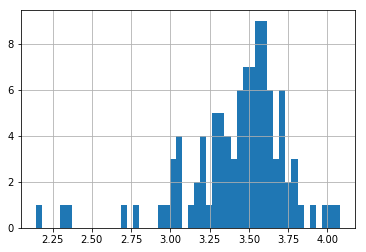

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
Ratings['RATING'].hist(bins=50)

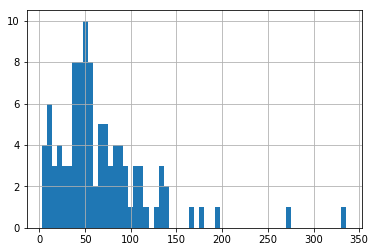

In [16]:
Ratings['number_of_ratings'].hist(bins=60)

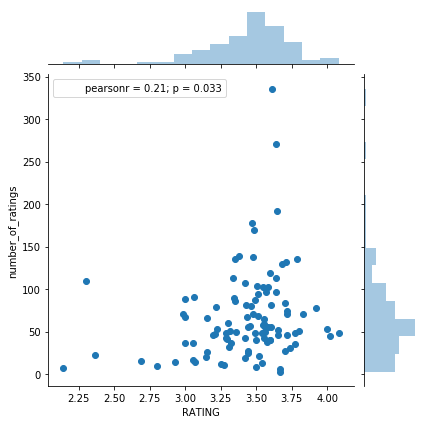

In [17]:
import seaborn as sns
sns.jointplot(x='RATING', y='number_of_ratings', data=Ratings)

In [18]:
Book_matrix = data.pivot_table(index='USER', columns='ITEM', values='RATING')
Book_matrix.head()

ITEM,7386648,7442920,7444117,141039280,307943232,316044695,316055433,345803485,345803493,345803507,...,B00DAHSVYC,B00DJFIMW6,B00DR0PDNE,B00E8KLWB4,B00FAPF5U0,B00FZM8Z7I,B00G5LQ5MU,B00I3MMN4I,B00I3MPDP4,B00I8Q77Y0
USER,,,,,,,,,,,,,,,,,,,,,
A0718784TOWF9DX1DOFD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A100L918633LUO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A102Z3T7NSM5KC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A105A034ZG9EHO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A105CCKIWRGI3X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
Ratings.sort_values('number_of_ratings', ascending=False).head(10)

,RATING,number_of_ratings
ITEM,,
439023513,3.613095,336
439023483,3.638376,271
B003ES5ZUU,3.645833,192
B0051VVOB2,3.471910,178
030758836X,3.485207,169
B006GWO5WK,3.381295,139
B007WTAJTO,3.478261,138
B003EYVXV4,3.348148,135
141039280,3.785185,135


In [20]:
U_rating = Book_matrix[439023483]
contact_rating = Book_matrix['B003ES5ZUU']

In [21]:
U_rating.head()

USER
A0718784TOWF9DX1DOFD   NaN
A100L918633LUO         NaN
A102Z3T7NSM5KC         NaN
A105A034ZG9EHO         NaN
A105CCKIWRGI3X         NaN
Name: 439023483, dtype: float64

In [22]:
contact_rating.head()

USER
A0718784TOWF9DX1DOFD    4.0
A100L918633LUO          NaN
A102Z3T7NSM5KC          NaN
A105A034ZG9EHO          NaN
A105CCKIWRGI3X          NaN
Name: B003ES5ZUU, dtype: float64

In [23]:
similar_to_439023483 =Book_matrix.corrwith(U_rating)

In [24]:
similar_to_439023483.head()

ITEM
7386648      0.000000
7442920      0.577350
7444117     -0.612372
141039280    0.603957
307943232         NaN
dtype: float64

a strong correlation (of 0.779) between 439023483 and 141039280.

In [25]:
corr_contact = pd.DataFrame(similar_to_439023483, columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head()

,Correlation
ITEM,
7386648,0.000000
7442920,0.577350
7444117,-0.612372
141039280,0.603957
345803485,0.522233


In [26]:
similar_to_contact = Book_matrix.corrwith(contact_rating)

In [27]:
corr_AFO = pd.DataFrame(contact_rating, columns=['correlation'])
corr_AFO.dropna(inplace=True)
corr_AFO.head()

,correlation


In [28]:
corr_AFO = corr_AFO.join(Ratings['number_of_ratings'])
corr_contact = corr_contact.join(Ratings['number_of_ratings'])
corr_AFO .head()
corr_contact.head()

,Correlation,number_of_ratings
ITEM,,
7386648,0.000000,97
7442920,0.577350,94
7444117,-0.612372,89
141039280,0.603957,135
345803485,0.522233,110


In [29]:
corr_AFO[corr_AFO['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings


In [31]:
final_data= corr_contact[corr_contact['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

In [32]:
final_data['title'] = 'nan'
for i in final_data.index:
    final_data['title'][i] = items.loc[items['ITEM']==i,'title'].values

In [33]:
final_data

,Correlation,number_of_ratings,title
ITEM,,,
439023483,1.000000,271,[Rectangular Dark Orange Enamel Silver Cufflin...
B006GWO5WK,1.000000,139,[Akhiyon Se Goli Maare]
B00FZM8Z7I,1.000000,113,[FROZEN]
B000GF7ZRA,0.871421,104,[Trendy Digital]
B009SYZ8OC,0.866025,113,[AmazonBasics Apple Certified Lightning to USB...
B0051VVOB2,0.816497,178,[Voyage]
439023513,0.806697,336,"[Pedro s Oranj Peelz Degreaser, The Man with t..."
030758836X,0.686803,169,[Gone Girl]
141039280,0.603957,135,[Pedro s Ice Wax All Purpose Bicycle Chain Lub...


In [34]:
final_data['title']

ITEM
439023483     [Rectangular Dark Orange Enamel Silver Cufflin...
B006GWO5WK                              [Akhiyon Se Goli Maare]
B00FZM8Z7I                                             [FROZEN]
B000GF7ZRA                                     [Trendy Digital]
B009SYZ8OC    [AmazonBasics Apple Certified Lightning to USB...
B0051VVOB2                                             [Voyage]
439023513     [Pedro s Oranj Peelz Degreaser, The Man with t...
030758836X                                          [Gone Girl]
141039280     [Pedro s Ice Wax All Purpose Bicycle Chain Lub...
345803485                                         [Great Books]
Name: title, dtype: object